In [47]:
# Install packages
!pip3 install --quiet duckdb
!pip3 install --quiet jupysql
!pip3 install --quiet duckdb-engine
!pip3 install --quiet pandas

# Import modules
import duckdb
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Import jupysql Jupyter extension to create SQL cells
%load_ext sql

# We configure jupysql to return data as a Pandas dataframe and have less verbose output
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

# Connect jupysql to DuckDB using a SQLAlchemy-style connection string.
%sql duckdb:///:memory:


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [35]:
# Reload sql
%reload_ext sql

In [2]:
!git clone https://github.com/matthieuahkoon/product-ops-ticketing.git


Cloning into 'product-ops-ticketing'...
remote: Enumerating objects: 1163, done.
remote: Counting objects: 100% (1163/1163), done.
remote: Compressing objects: 100% (1061/1061), done.
remote: Total 1163 (delta 90), reused 1160 (delta 90), pack-reused 0
Receiving objects: 100% (1163/1163), 3.57 MiB | 15.76 MiB/s, done.
Resolving deltas: 100% (90/90), done.


In [ ]:
!pwd


/content


In [3]:
monthly_overview = pd.read_csv('/content/product-ops-ticketing/data/monthly_kpi_performance_data.csv')
monthly_orders = pd.read_csv('/content/product-ops-ticketing/data/monthly_order_volume_data.csv')
monthly_contact_costs = pd.read_csv('/content/product-ops-ticketing/data/contact_center_cost_data.csv')

print(monthly_overview.columns)


Index(['Month', 'entity', 'Department', 'Contact Rate', 'Self Service rate',
       'Automation rate', '% Missed Contacts', 'SLA 30s', 'AHT (min)',
       'After Contact CSAT', 'No Contact CSAT', 'Shrinkage ',
       'Compensation cost [EUR]'],
      dtype='object')


In [ ]:
%%sql

select * from monthly_overview limit 5

,Month,entity,Department,Contact Rate,Self Service rate,Automation rate,% Missed Contacts,SLA 30s,AHT (min),After Contact CSAT,No Contact CSAT,Shrinkage,Compensation cost [EUR]
0,2023-01,entity 1,Customer,3.2%,55.0%,23.0%,9.9%,80.7%,9.6,70%,48%,5.0%,"$73,542"
1,2023-02,entity 1,Customer,3.0%,56.7%,24.2%,9.4%,78.3%,9.1,69%,48%,4.8%,"$77,955"
2,2023-03,entity 1,Customer,2.8%,58.3%,25.4%,9.5%,80.7%,8.7,70%,49%,4.6%,"$85,750"
3,2023-04,entity 1,Customer,2.8%,58.9%,27.6%,9.7%,83.9%,9.1,69%,51%,4.4%,"$90,037"
4,2023-05,entity 1,Customer,2.6%,61.3%,30.4%,9.8%,83.0%,9.0,66%,53%,4.2%,"$99,041"


In [ ]:
%%sql

SELECT
  month,
  entity,
  "# Orders" AS order_count,
  "Own Delivery Rate" AS own_delivery_rate
FROM monthly_orders LIMIT 5

,month,entity,order_count,own_delivery_rate
0,2023-01,entity 1,"5,543,695",96.0%
1,2023-02,entity 1,"5,654,569",95.0%
2,2023-03,entity 1,"5,824,206",96.0%
3,2023-04,entity 1,"5,824,206",96.0%
4,2023-05,entity 1,"5,649,480",96.0%


In [ ]:
%%sql

SELECT
  Entity AS entity,
  Department AS department,
  ROUND(CAST(REPLACE("Cost per contact [EUR]", '$', '') AS FLOAT), 2) AS cost_per_contact_EUR
FROM monthly_contact_costs

LIMIT 5

,entity,department,cost_per_contact_EUR
0,entity 1,Customer,2.90
1,entity 2,Customer,0.90
2,entity 3,Customer,2.40
3,entity 4,Customer,1.00
4,entity 1,Vendor,3.68


In [ ]:
%%sql

SELECT
  Month AS month,
  entity,
  ROUND((CAST(REPLACE("Contact Rate", '%', '') AS FLOAT) / 100), 3) AS contact_rate_num,
  "Contact Rate" AS contact_rate_label
FROM monthly_overview
WHERE Department = 'Customer'




,month,entity,contact_rate_num,contact_rate_label
0,2023-01,entity 1,0.032,3.2%
1,2023-02,entity 1,0.030,3.0%
2,2023-03,entity 1,0.028,2.8%
3,2023-04,entity 1,0.028,2.8%
4,2023-05,entity 1,0.026,2.6%
5,2023-06,entity 1,0.025,2.5%
6,2023-07,entity 1,0.024,2.4%
7,2023-08,entity 1,0.023,2.3%
8,2023-09,entity 1,0.021,2.1%
9,2023-01,entity 2,0.036,3.6%


In [ ]:
%%sql

-- data model

WITH

monthly_performance AS (
  SELECT
      Month AS month,
      entity,
      Department AS department,
      ROUND((CAST(REPLACE("Contact Rate", '%', '') AS FLOAT) / 100), 3) AS contact_rate_num,
      "Contact Rate" AS contact_rate_label,
      "Self Service rate" AS self_service_rate,
      CASE
        WHEN "Automation rate" = '-' THEN NULL
        ELSE "Automation rate"
      END AS automation_rate,
      "% Missed Contacts" AS missed_contacts_rate,
      "SLA 30s" AS sla_30s,
      "AHT (min)" AS average_handling_time_min,
      "After Contact CSAT" AS after_contact_csat,
      "No Contact CSAT" AS no_contact_csat,
      "Shrinkage " AS shrinkage,
      CASE
        WHEN "Compensation cost [EUR]" = '-' THEN NULL
        ELSE CAST(REPLACE(REPLACE("Compensation cost [EUR]", '$', ''), ',', '') AS INT)
      END AS compensation_cost_eur
    FROM monthly_overview
    --WHERE Department = 'Customer'
),
contact_avg_cost AS (
  SELECT
    Entity AS entity,
    Department AS department,
    ROUND(CAST(REPLACE("Cost per contact [EUR]", '$', '') AS FLOAT), 2) AS cost_per_contact_eur
  FROM monthly_contact_costs
),

order_volume AS (
SELECT
  month,
  entity,
  CAST(REPLACE("# Orders", ',', '') AS INT) AS order_count,
  "Own Delivery Rate" AS own_delivery_rate
FROM monthly_orders
),

final AS (
SELECT
m.month,
m.entity,
m.department,
m.contact_rate_num,
m.contact_rate_label,
CAST(ROUND(m.contact_rate_num * CAST(v.order_count AS FLOAT), 0) AS INT) AS contact_count,
c.cost_per_contact_eur,
CAST(ROUND(m.contact_rate_num * CAST(v.order_count AS FLOAT), 0) AS INT) * c.cost_per_contact_eur AS total_contact_costs,
v.order_count,
v.own_delivery_rate,
m.contact_rate_label,
m.self_service_rate,
m.automation_rate,
m.missed_contacts_rate,
m.sla_30s,
m.average_handling_time_min,
m.after_contact_csat,
m.no_contact_csat,
m.shrinkage,
m.compensation_cost_eur
FROM monthly_performance m
LEFT JOIN contact_avg_cost c
ON m.entity = c.entity AND m.department = c.department
LEFT JOIN order_volume v
ON m.month = v.month AND m.entity = v.entity
# WHERE m.department = 'Customer'
)

SELECT
*
FROM final
# GROUP BY month
ORDER BY month ASC


,month,entity,department,contact_rate_num,contact_rate_label,contact_count,cost_per_contact_eur,total_contact_costs,order_count,own_delivery_rate,contact_rate_label:1,self_service_rate,automation_rate,missed_contacts_rate,sla_30s,average_handling_time_min,after_contact_csat,no_contact_csat,shrinkage,compensation_cost_eur
0,2023-01,entity 1,Customer,0.032,3.2%,177398,2.90,514454.218750,5543695,96.0%,3.2%,55.0%,23.0%,9.9%,80.7%,9.6,70%,48%,5.0%,73542.0
1,2023-01,entity 1,Rider,0.047,4.7%,260554,2.49,648779.437500,5543695,96.0%,4.7%,59.0%,None,4.2%,80.7%,6.5,70%,48%,4.0%,NaN
2,2023-01,entity 4,Rider,0.049,4.9%,468565,0.99,463879.343750,9562541,23.5%,4.9%,54.0%,None,4.2%,80.7%,6.5,70%,48%,4.0%,NaN
3,2023-01,entity 4,Vendor,0.018,1.8%,172126,1.34,230648.843750,9562541,23.5%,1.8%,38.0%,None,2.5%,80.7%,6.5,70%,48%,9.0%,NaN
4,2023-01,entity 4,Customer,0.041,4.1%,392064,1.00,392064.000000,9562541,23.5%,4.1%,48.5%,12.6%,7.5%,80.7%,9.6,70%,48%,5.0%,354000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2023-09,entity 2,Vendor,0.013,1.3%,205523,1.25,256903.750000,15809433,5.2%,1.3%,45.3%,None,2.6%,76.7%,6.7,66%,47%,9.5%,NaN
104,2023-09,entity 2,Customer,0.052,5.2%,822091,0.90,739881.875000,15809433,5.2%,5.2%,26.9%,9.1%,9.3%,78.8%,10.9,75%,50%,5.5%,255695.0
105,2023-09,entity 3,Customer,0.029,2.9%,12184,2.40,29241.601562,420136,92.4%,2.9%,39.1%,8.3%,9.4%,81.1%,8.5,72%,46%,5.2%,11266.0
106,2023-09,entity 3,Vendor,0.020,2.0%,8403,3.22,27057.660156,420136,92.4%,2.0%,29.1%,None,2.2%,68.4%,7.2,76%,46%,9.1%,NaN


In [ ]:
%%sql

-- testing global customer contact rate

WITH

monthly_performance AS (
  SELECT
      Month AS month,
      entity,
      Department AS department,
      ROUND((CAST(REPLACE("Contact Rate", '%', '') AS FLOAT) / 100), 3) AS contact_rate_num,
      "Contact Rate" AS contact_rate_label,
      "Self Service rate" AS self_service_rate,
      "Automation rate" AS automation_rate,
      "% Missed Contacts" AS missed_contacts_rate,
      "SLA 30s" AS sla_30s,
      "AHT (min)" AS average_handling_time_min,
      "After Contact CSAT" AS after_contact_csat,
      "No Contact CSAT" AS no_contact_csat,
      "Shrinkage " AS shrinkage,
      CAST(REPLACE("Compensation cost [EUR]", '$', '') AS INT) AS compensation_cost_eur
    FROM monthly_overview
    --WHERE Department = 'Customer'
),
contact_avg_cost AS (
  SELECT
    Entity AS entity,
    Department AS department,
    ROUND(CAST(REPLACE("Cost per contact [EUR]", '$', '') AS FLOAT), 2) AS cost_per_contact_eur
  FROM monthly_contact_costs
),

order_volume AS (
SELECT
  month,
  entity,
  CAST(REPLACE("# Orders", ',', '') AS INT) AS order_count,
  "Own Delivery Rate" AS own_delivery_rate
FROM monthly_orders
),

final AS (
SELECT
m.month,
m.entity,
m.department,
m.contact_rate_num,
m.contact_rate_label,
CAST(ROUND(m.contact_rate_num * CAST(v.order_count AS FLOAT), 0) AS INT) AS contact_count,
c.cost_per_contact_eur,
CAST(ROUND(m.contact_rate_num * CAST(v.order_count AS FLOAT), 0) AS INT) * c.cost_per_contact_eur AS total_contact_costs,
v.order_count,
v.own_delivery_rate,
m.contact_rate_label,
m.self_service_rate,
m.automation_rate,
m.missed_contacts_rate,
m.sla_30s,
m.average_handling_time_min,
m.after_contact_csat,
m.no_contact_csat,
m.shrinkage,
m.compensation_cost_eur
FROM monthly_performance m
LEFT JOIN contact_avg_cost c
ON m.entity = c.entity AND m.department = c.department
LEFT JOIN order_volume v
ON m.month = v.month AND m.entity = v.entity
WHERE m.department = 'Customer'
)

SELECT
month,
SUM(contact_count) AS contact_total,
sum(order_count) AS order_total,
SUM(contact_count)/sum(order_count) AS global_contact_rate

FROM final
GROUP BY month
ORDER BY month ASC


,month,contact_total,order_total,global_contact_rate
0,2023-01,1138518.0,31076581.0,0.036636
1,2023-02,1172281.0,31006135.0,0.037808
2,2023-03,1169863.0,31619744.0,0.036998
3,2023-04,1204052.0,31498906.0,0.038225
4,2023-05,1213837.0,31605499.0,0.038406
5,2023-06,1261625.0,31796765.0,0.039678
6,2023-07,1254191.0,30764425.0,0.040768
7,2023-08,1303110.0,30847262.0,0.042244
8,2023-09,1352130.0,31398991.0,0.043063


In [50]:
%%sql

COPY (

WITH

monthly_performance AS (
  SELECT
      Month AS month,
      entity,
      Department AS department,
      ROUND((CAST(REPLACE("Contact Rate", '%', '') AS FLOAT) / 100), 3) AS contact_rate_num,
      "Contact Rate" AS contact_rate_label,
      "Self Service rate" AS self_service_rate,
      "Automation rate" AS automation_rate,
      "% Missed Contacts" AS missed_contacts_rate,
      "SLA 30s" AS sla_30s,
      "AHT (min)" AS average_handling_time_min,
      "After Contact CSAT" AS after_contact_csat,
      "No Contact CSAT" AS no_contact_csat,
      "Shrinkage " AS shrinkage,
      CAST(REPLACE("Compensation cost [EUR]", '$', '') AS INT) AS compensation_cost_eur
    FROM monthly_overview
    --WHERE Department = 'Customer'
),
contact_avg_cost AS (
  SELECT
    Entity AS entity,
    Department AS department,
    ROUND(CAST(REPLACE("Cost per contact [EUR]", '$', '') AS FLOAT), 2) AS cost_per_contact_eur
  FROM monthly_contact_costs
),

order_volume AS (
SELECT
  month,
  entity,
  CAST(REPLACE("# Orders", ',', '') AS INT) AS order_count,
  "Own Delivery Rate" AS own_delivery_rate
FROM monthly_orders
)

SELECT
m.month,
m.entity,
m.department,
m.contact_rate_num,
m.contact_rate_label,
CAST(ROUND(m.contact_rate_num * CAST(v.order_count AS FLOAT), 0) AS INT) AS contact_count,
c.cost_per_contact_eur,
CAST(ROUND(m.contact_rate_num * CAST(v.order_count AS FLOAT), 0) AS INT) * c.cost_per_contact_eur AS total_contact_costs,
v.order_count,
v.own_delivery_rate
FROM monthly_performance m
LEFT JOIN contact_avg_cost c
ON m.entity = c.entity AND m.department = c.department
LEFT JOIN order_volume v
ON m.month = v.month AND m.entity = v.entity

) TO '/content/product-ops-ticketing/data/monthly_service_performance.csv' (HEADER, DELIMITER ',');

,Success


In [ ]:
%%sql

WITH

monthly_performance AS (
  SELECT
      Month AS month,
      entity,
      Department AS department,
      ROUND((CAST(REPLACE("Contact Rate", '%', '') AS FLOAT) / 100), 3) AS contact_rate_num,
      "Contact Rate" AS contact_rate_label,
      "Self Service rate" AS self_service_rate,
      "Automation rate" AS automation_rate,
      "% Missed Contacts" AS missed_contacts_rate,
      "SLA 30s" AS sla_30s,
      "AHT (min)" AS average_handling_time_min,
      "After Contact CSAT" AS after_contact_csat,
      "No Contact CSAT" AS no_contact_csat,
      "Shrinkage " AS shrinkage,
      CAST(REPLACE("Compensation cost [EUR]", '$', '') AS INT) AS compensation_cost_eur
    FROM monthly_overview
    --WHERE Department = 'Customer'
),
contact_avg_cost AS (
  SELECT
    Entity AS entity,
    Department AS department,
    ROUND(CAST(REPLACE("Cost per contact [EUR]", '$', '') AS FLOAT), 2) AS cost_per_contact_eur
  FROM monthly_contact_costs
),

order_volume AS (
SELECT
  month,
  entity,
  CAST(REPLACE("# Orders", ',', '') AS INT) AS order_count,
  "Own Delivery Rate" AS own_delivery_rate
FROM monthly_orders
)

SELECT
m.month,
m.entity,
m.department,
m.contact_rate_num,
m.contact_rate_label,
CAST(ROUND(m.contact_rate_num * CAST(v.order_count AS FLOAT), 0) AS INT) AS contact_count,
c.cost_per_contact_eur,
CAST(ROUND(m.contact_rate_num * CAST(v.order_count AS FLOAT), 0) AS INT) * c.cost_per_contact_eur AS total_contact_costs,
v.order_count,
v.own_delivery_rate
FROM monthly_performance m
LEFT JOIN contact_avg_cost c
ON m.entity = c.entity AND m.department = c.department
LEFT JOIN order_volume v
ON m.month = v.month AND m.entity = v.entity

In [70]:
%%sql

COPY (
-- data model v2

WITH

monthly_performance AS (
  SELECT
      Month AS month,
      entity,
      Department AS department,
      ROUND((CAST(REPLACE("Contact Rate", '%', '') AS FLOAT) / 100), 3) AS contact_rate_num,
      "Contact Rate" AS contact_rate_label,
      "Self Service rate" AS self_service_rate,
      CASE
        WHEN "Automation rate" = '-' THEN NULL
        ELSE "Automation rate"
      END AS automation_rate,
      "% Missed Contacts" AS missed_contacts_rate,
      "SLA 30s" AS sla_30s,
      "AHT (min)" AS average_handling_time_min,
      "After Contact CSAT" AS after_contact_csat,
      "No Contact CSAT" AS no_contact_csat,
      "Shrinkage " AS shrinkage,
      CASE
        WHEN "Compensation cost [EUR]" = '-' THEN NULL
        ELSE CAST(REPLACE(REPLACE("Compensation cost [EUR]", '$', ''), ',', '') AS INT)
      END AS compensation_cost_eur
    FROM monthly_overview
    --WHERE Department = 'Customer'
),
contact_avg_cost AS (
  SELECT
    Entity AS entity,
    Department AS department,
    ROUND(CAST(REPLACE("Cost per contact [EUR]", '$', '') AS FLOAT), 2) AS cost_per_contact_eur
  FROM monthly_contact_costs
),

order_volume AS (
SELECT
  month,
  entity,
  CAST(REPLACE("# Orders", ',', '') AS INT) AS order_count,
  "Own Delivery Rate" AS own_delivery_rate
FROM monthly_orders
),

final AS (
SELECT
m.month,
m.entity,
m.department,
m.contact_rate_num,
m.contact_rate_label,
CAST(ROUND(m.contact_rate_num * CAST(v.order_count AS FLOAT), 0) AS INT) AS contact_count,
c.cost_per_contact_eur,
CAST(ROUND(m.contact_rate_num * CAST(v.order_count AS FLOAT), 0) AS INT) * c.cost_per_contact_eur AS total_contact_costs,
v.order_count,
v.own_delivery_rate,
m.self_service_rate,
m.automation_rate,
m.missed_contacts_rate,
m.sla_30s,
m.average_handling_time_min,
m.after_contact_csat,
m.no_contact_csat,
m.shrinkage,
m.compensation_cost_eur
FROM monthly_performance m
LEFT JOIN contact_avg_cost c
ON m.entity = c.entity AND m.department = c.department
LEFT JOIN order_volume v
ON m.month = v.month AND m.entity = v.entity
WHERE m.department = 'Customer' AND m.entity = 'entity 1'
)

SELECT
month,
entity,
MAX(compensation_cost_eur) AS compensations,
SUM(contact_count) AS contacts
FROM final
GROUP BY month, entity
ORDER BY month, entity ASC


) TO '/content/product-ops-ticketing/data/compensation_contact_corr.csv' (HEADER, DELIMITER ',');

,Success


In [71]:
compensation = pd.read_csv('/content/product-ops-ticketing/data/compensation_contact_corr.csv')

In [52]:
print(compensation)

     month    entity  compensations  contacts
0  2023-01  entity 1          73542    177398
1  2023-02  entity 1          77955    169637
2  2023-03  entity 1          85750    163078
3  2023-04  entity 1          90037    163078
4  2023-05  entity 1          99041    146886
5  2023-06  entity 1         103993    146886
6  2023-07  entity 1         114393    141011
7  2023-08  entity 1         124688    140541
8  2023-09  entity 1         130922    128320


In [72]:
x = pd.Series(compensation['compensations'])
y = pd.Series(compensation['contacts'])

print(y)

0    177398
1    169637
2    163078
3    163078
4    146886
5    146886
6    141011
7    140541
8    128320
Name: contacts, dtype: int64


In [54]:
x.corr(y)  # Pearson's r

-0.9695105526716399

In [55]:

y.corr(x) # Pearson's r

-0.96951055267164

In [56]:

x.corr(y, method='spearman')  # Spearman's rho

-0.991631652042901

In [57]:

x.corr(y, method='kendall')   # Kendall's tau

-0.97182531580755

In [58]:
result = scipy.stats.linregress(x, y)

In [59]:
result.slope

-0.7681941557065795

In [60]:
result.intercept

229828.48116221148

In [61]:
result.rvalue

-0.9695105526716401

In [62]:
result.pvalue #very significant

1.5816706652614776e-05

In [63]:
result.stderr

0.07338771578810757

In [64]:
xy = np.array([x, y])
scipy.stats.linregress(x, y)

LinregressResult(slope=-0.7681941557065795, intercept=229828.48116221148, rvalue=-0.9695105526716401, pvalue=1.5816706652614776e-05, stderr=0.07338771578810757, intercept_stderr=7473.795001903484)

In [65]:
scipy.stats.linregress(xy.T)

LinregressResult(slope=-0.7681941557065795, intercept=229828.48116221148, rvalue=-0.9695105526716401, pvalue=1.5816706652614776e-05, stderr=0.07338771578810757, intercept_stderr=7473.795001903484)

In [66]:
slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)

In [67]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line


'Regression line: y=229828.48+-0.77x, r=-0.97'

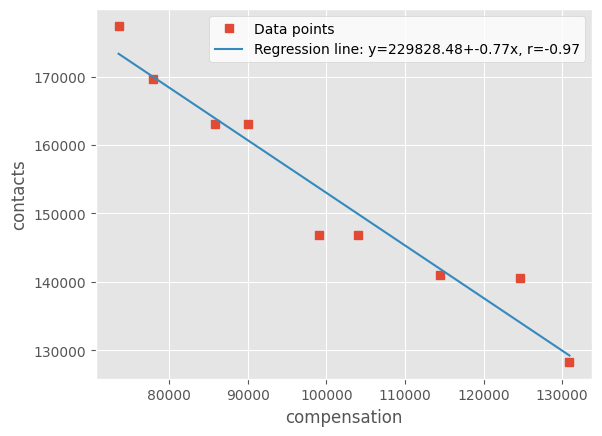

In [68]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('compensation')
ax.set_ylabel('contacts')
ax.legend(facecolor='white')
plt.show()